In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import warnings
warnings.filterwarnings('ignore')

# 1. Reading the Data using Pandas

In [25]:
oData = pd.read_csv('file.csv')
print('Shape of Data: ', oData.shape)
oData.head()

Shape of Data:  (2665, 6)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [26]:
oData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [27]:
oData.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Copy the dataset into another, and replace integer label by string 

In [28]:
nData = oData.copy() 

nData['Occupancy'] = nData.Occupancy.replace({0: 'Empty', 1:'Occupied'}).astype('object')

nDataEmpty = nData[nData['Occupancy'] == 'Empty']
nDataOccupied = nData[nData['Occupancy'] == 'Occupied'] 

In [29]:
nData.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,Occupied
1,23.7180,26.290,578.400000,760.400000,0.004773,Occupied
2,23.7300,26.230,572.666667,769.666667,0.004765,Occupied
3,23.7225,26.125,493.750000,774.750000,0.004744,Occupied
4,23.7540,26.200,488.600000,779.000000,0.004767,Occupied


## 2. Data Analysis 

#### Show to Ratio of Occupancy

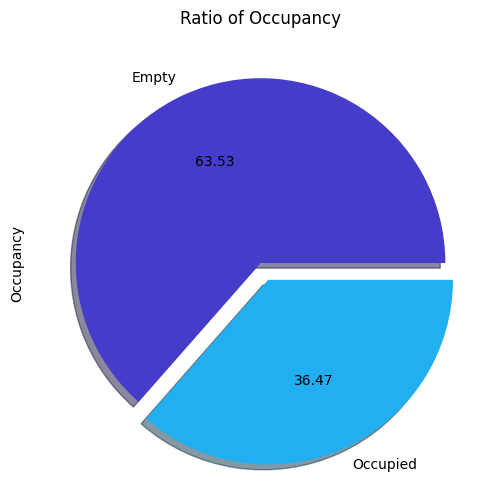

In [8]:
colors=('#453CC9','#22AFF1')
explode=[0,0.1]
nData['Occupancy'].value_counts().plot(kind='pie', shadow=True, explode=explode, colors=colors, autopct='%.2f',figsize=(8,6))

plt.title('Ratio of Occupancy')
plt.show()

### a. Correlation between the variables

<Axes: title={'center': 'Correlation between variables'}>

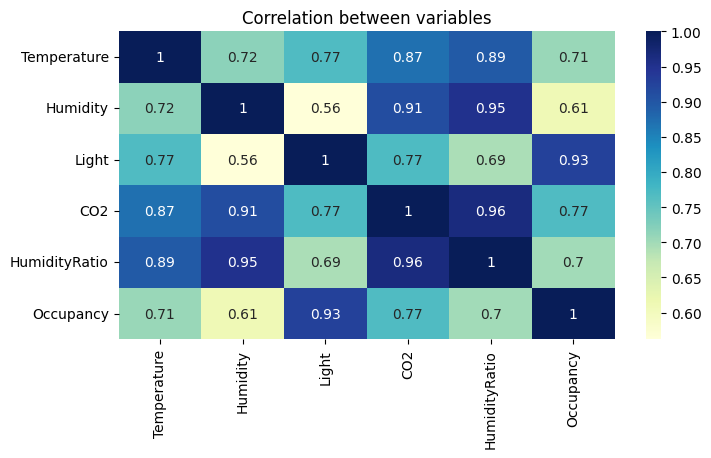

In [9]:
plt.subplots(figsize=(8,4))
plt.title('Correlation between variables')
sns.heatmap(oData.corr(), annot=True, cmap='YlGnBu')

##### c. Graph: Overlapped Humidity Data When Room Occupied/Empty 

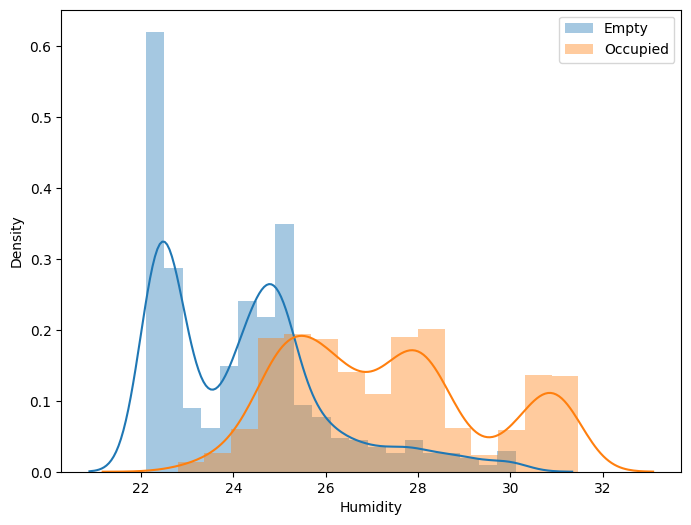

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(nDataEmpty['Humidity'], label='Empty')
sns.distplot(nDataOccupied['Humidity'], label='Occupied')
plt.legend()

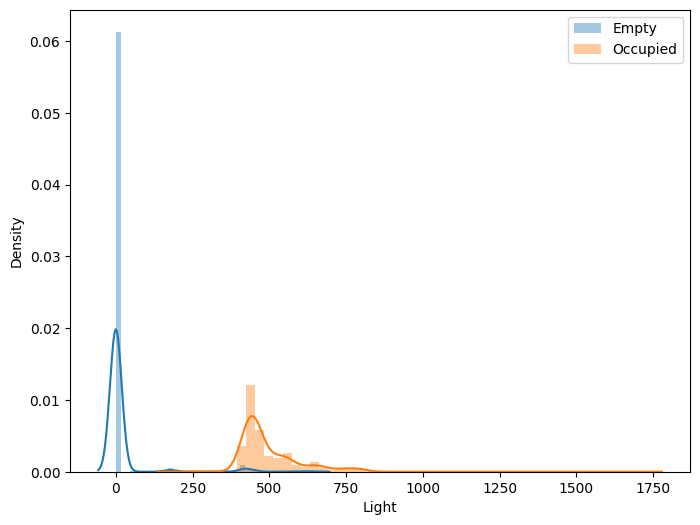

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(nDataEmpty['Light'], label='Empty')
sns.distplot(nDataOccupied['Light'], label='Occupied')
plt.legend()

As we can see that light is highly dependent variable

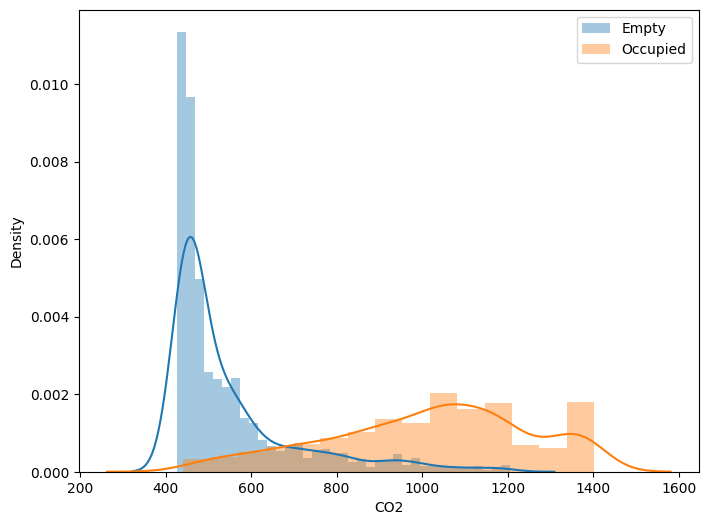

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(nDataEmpty['CO2'], label='Empty')
sns.distplot(nDataOccupied['CO2'], label='Occupied')
plt.legend()

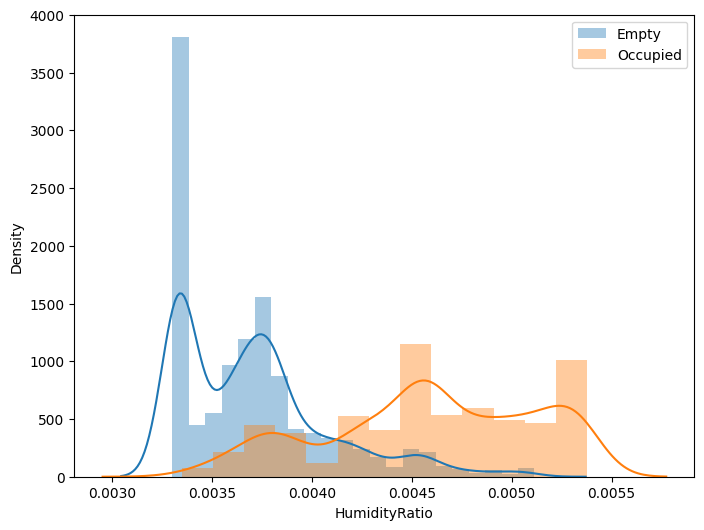

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(nDataEmpty['HumidityRatio'], label='Empty')
sns.distplot(nDataOccupied['HumidityRatio'], label='Occupied')
plt.legend()

## 3. Data Pre-Processing 

### a. Check the Outliers

In [14]:
def plot_boxplot(data, features):
    fig, axes = plt.subplots(1, len(features))

    fig.set_figheight(10)
    fig.set_figwidth(25)
    
    plt.grid(False)
    sns.set_theme(style='whitegrid')

    index=0
    for i in features:
        b = sns.boxplot( ax=axes[index], data=data,  y=i)
        b.set_xlabel(i, fontsize=20)
        b.set_ylabel('')
        index=index+1

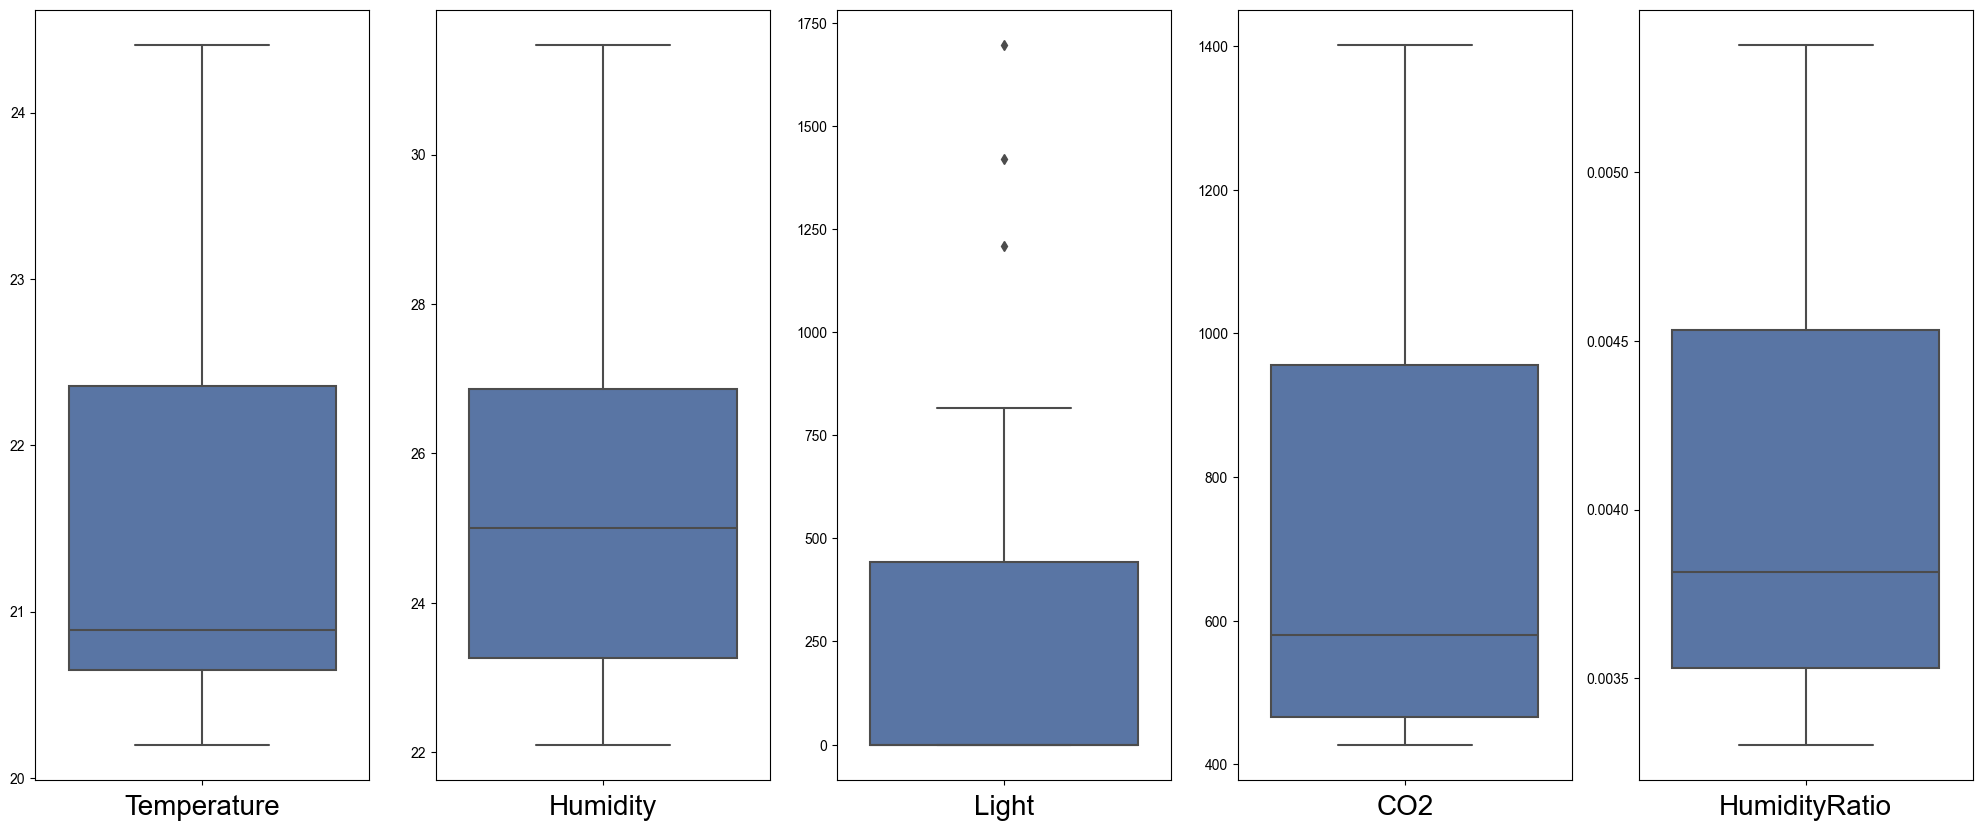

In [15]:
features = oData.drop(columns='Occupancy').columns

plot_boxplot(oData, features)

As you can see that light has some outliers

### b. Remove Outliers

In [16]:
def clean_outliers(data, features):
    for feature in features:
        
        #Find min and max thresold 
        minThresold = data[feature].quantile(0.25)
        maxThresold = data[feature].quantile(0.75)   
        
        iQR = maxThresold - minThresold

        # calculate the outlier cutoff
        cutOff = 1.5 * iQR
        
        lower, upper = minThresold - cutOff, maxThresold + cutOff
        
        #Remove the outliers
        
        data = data[ (data[feature] > lower) & (data[feature] < upper) ]
    
    return data

In [17]:
cData = clean_outliers(oData, features)
print("Original shape: ", oData.shape)
print("Cleaned shape: ", cData.shape)

Original shape:  (2665, 6)
Cleaned shape:  (2662, 6)


#### We just clean the 3 rows 

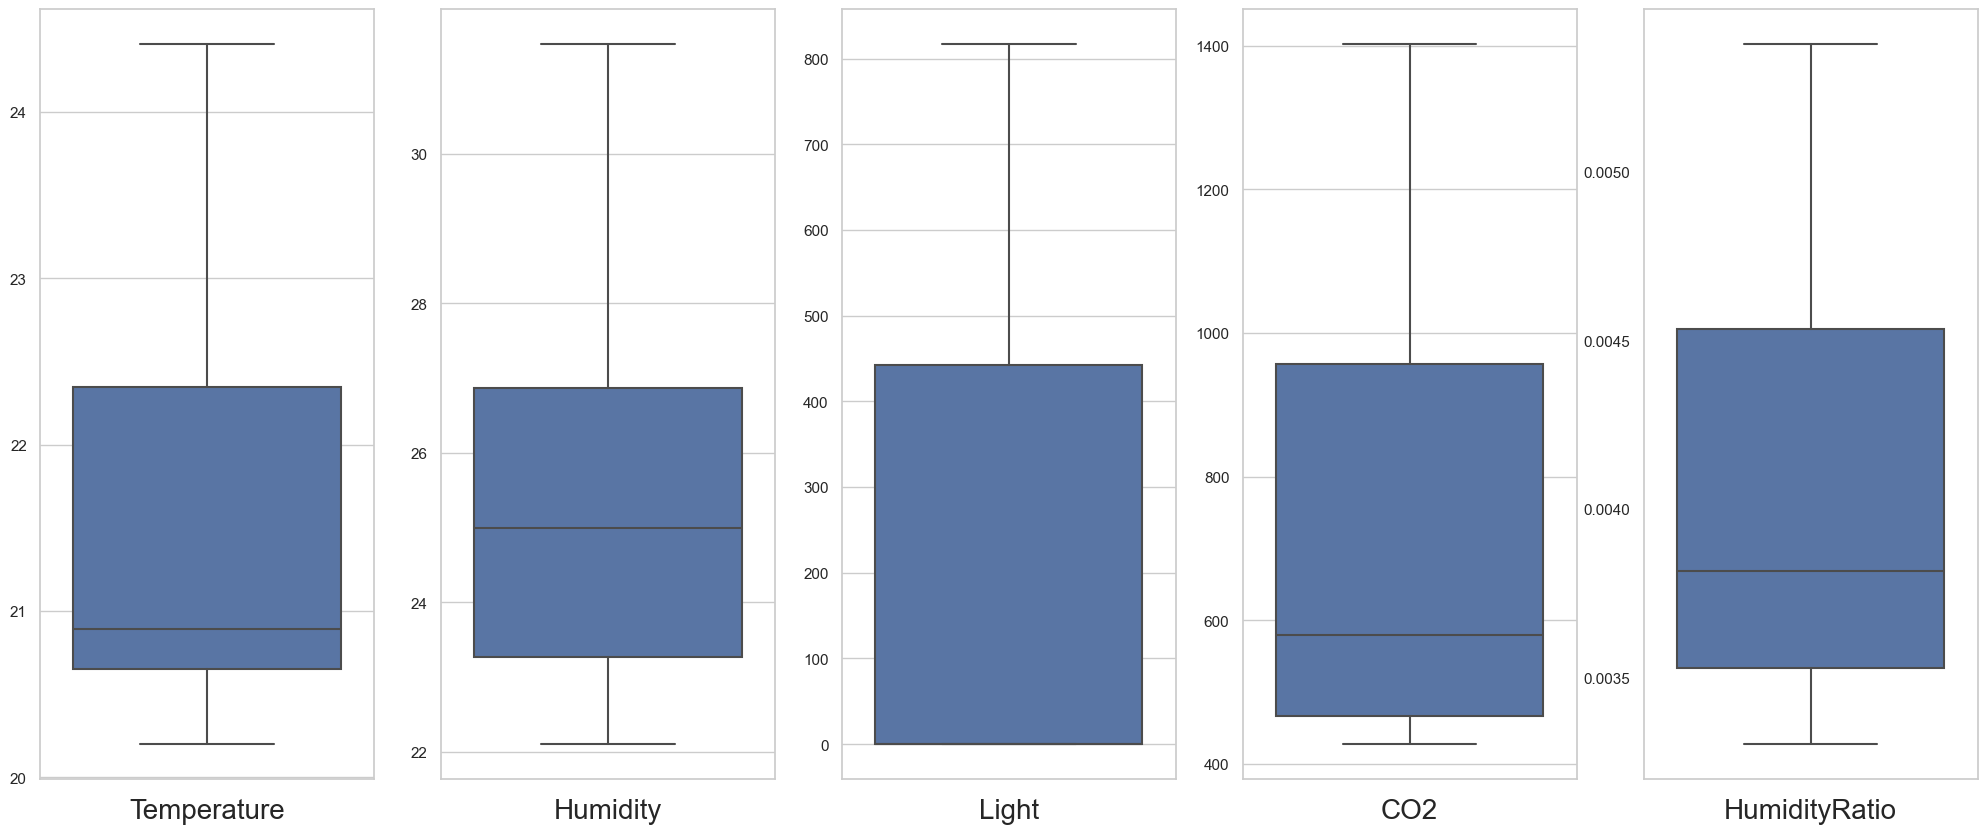

In [18]:
features = oData.drop(columns='Occupancy').columns

plot_boxplot(cData, features)

In [19]:
cData.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000
mean,21.432487,25.353799,191.820017,717.642897,0.004027,0.364012
std,1.027768,2.438212,246.719570,292.741171,0.000611,0.481242
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003528,0.000000
50%,20.890000,25.000000,0.000000,579.600000,0.003815,0.000000
75%,22.345000,26.866667,442.500000,956.312500,0.004532,1.000000
max,24.408333,31.472500,817.000000,1402.250000,0.005378,1.000000


### c. Normalized DataSet for Models based on GD

In [20]:
import pandas as pd
from sklearn import preprocessing

x = cData.values #returns a numpy array
minMaxScaler = preprocessing.MinMaxScaler()
xScaled = minMaxScaler.fit_transform(x)
nData = pd.DataFrame(xScaled, columns=cData.columns)

print(cData.head())
print(nData.head())

   Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1
   Temperature  Humidity     Light       CO2  HumidityRatio  Occupancy
0     0.831683  0.445132  0.716279  0.330033       0.704212        1.0
1     0.835960  0.447053  0.707956  0.341523       0.708308        1.0
2     0.838812  0.440651  0.700938  0.351030       0.704689        1.0
3     0.837030  0.429448  0.604345  0.356245       0.694383        1.0
4     0.844515  0.437450  0.598042  0.360605       0.705384        1.0


## 4. Building Models 

### a. Split the dataset into Test and Train

In [21]:
features = cData.drop(columns='Occupancy')
target = cData['Occupancy']

nFeatures = nData.drop(columns='Occupancy')
nTarget = nData['Occupancy']

In [22]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.2, random_state=0)
xnTrain, xnTest, ynTrain, ynTest = train_test_split(nFeatures, nTarget, test_size=0.2, random_state=0)

print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(2129, 5)
(533, 5)
(2129,)
(533,)


### b. Model Training

Import some libaries for evaluation of models

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

#### 1. Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(xTrain, yTrain)

yPredict = tree.predict(xTest)

result = pd.DataFrame({"Model":['Decision Tree Classifier'],
                    "Accuracy Score": [accuracy_score(yPredict, yTest)],
                    "Recall": [recall_score(yTest, yPredict)],
                    "F1score": [f1_score(yTest, yPredict)]})

results = results.append(result)

##### Confusion Matrics 

In [26]:
pd.crosstab(yTest, yPredict, rownames=['Real Data'], colnames=['Predicted'])


Predicted,0,1
Real Data,,
0,330,7
1,0,196


#### 2. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=2500, max_depth=4)
rfc.fit(xTrain, yTrain)

yPredict = rfc.predict(xTest)

result = pd.DataFrame({"Model":['Random Forest Classifier'],
                    "Accuracy Score": [accuracy_score(yPredict, yTest)],
                    "Recall": [recall_score(yTest, yPredict)],
                    "F1score": [f1_score(yTest, yPredict)]})

results = results.append(result)

##### Confusion Matrics 

In [28]:
pd.crosstab(yTest , yPredict ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,329,8
1,0,196


#### 3. KNeighbors Classifier 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xTrain, yTrain)

yPredict = knn.predict(xTest)

result = pd.DataFrame({"Model":['KNeighbors Classifier'],
                    "Accuracy Score": [accuracy_score(yPredict, yTest)],
                    "Recall": [recall_score(yTest, yPredict)],
                    "F1score": [f1_score(yTest, yPredict)]})

results = results.append(result)

##### Confusion Matrics 

In [30]:
pd.crosstab(yTest , yPredict ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,332,5
1,2,194


#### 4. SVC

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xTrain, yTrain)

yPredict = svc.predict(xTest)

result = pd.DataFrame({"Model":['SVC'],
                    "Accuracy Score": [accuracy_score(yPredict, yTest)],
                    "Recall": [recall_score(yTest, yPredict)],
                    "F1score": [f1_score(yTest, yPredict)]})

results = results.append(result)

svc.fit(xnTrain, ynTrain)

ynPredict = svc.predict(xnTest)

result = pd.DataFrame({"Model":['SVC (normalized)'],
                    "Accuracy Score": [accuracy_score(yPredict, ynTest)],
                    "Recall": [recall_score(ynTest, yPredict)],
                    "F1score": [f1_score(ynTest, yPredict)]})

results = results.append(result)

##### Confusion Matrics 

In [32]:
pd.crosstab(yTest , yPredict ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,328,9
1,0,196


In [33]:
pd.crosstab(ynTest , ynPredict ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0.0,328,9
1.0,0,196


#### 5. Logisitc Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)

yPredict = lr.predict(xTest)

result = pd.DataFrame({"Model":['Logistic Regression'],
                    "Accuracy Score": [accuracy_score(yPredict, yTest)],
                    "Recall": [recall_score(yTest, yPredict)],
                    "F1score": [f1_score(yTest, yPredict)]})

results = results.append(result)


lr.fit(xnTrain, ynTrain)

yPredict = svc.predict(xnTest)

result = pd.DataFrame({"Model":['Logistic Regression (normalized)'],
                    "Accuracy Score": [accuracy_score(yPredict, ynTest)],
                    "Recall": [recall_score(ynTest, yPredict)],
                    "F1score": [f1_score(ynTest, yPredict)]})
results = results.append(result)


##### Confusion Matrics

In [35]:
pd.crosstab(yTest , yPredict ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0,328,9
1,0,196


In [36]:
results.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Recall,F1score
0,Decision Tree Classifier,0.986867,1.000000,0.982456
0,KNeighbors Classifier,0.986867,0.989796,0.982278
0,Random Forest Classifier,0.984991,1.000000,0.980000
0,SVC,0.983114,1.000000,0.977556
0,SVC (normalized),0.983114,1.000000,0.977556
0,Logistic Regression,0.983114,1.000000,0.977556
0,Logistic Regression (normalized),0.983114,1.000000,0.977556


How we see - **DecisionTreeClassifier** gives the best results

## 5. Model Evaluation

In [37]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc_curve

In [38]:
def evaluation(yTest, yPredict):
  acc = accuracy_score(yTest , yPredict)
  rcl = recall_score(yTest,yPredict)
  f1 = f1_score(yTest,yPredict)
  aucScore = roc_auc_score(yTest,yPredict)
  precScore = precision_score(yTest,yPredict)
 

  result = {'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'auc score': round(aucScore,3),
               'precision': round(precScore,3) 
              }

  return print(result)

In [39]:
treeModel = DecisionTreeClassifier(max_depth=4)
treeModel.fit(xTrain, yTrain)

yPredict = treeModel.predict(xTest)

pd.crosstab(yTest , yPredict ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,330,7
1,0,196


### Find the Best Parameters for DT

In [40]:

params = { 
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

grid = GridSearchCV(treeModel,
                    param_grid=params,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)

grid.fit(xTrain, yTrain)

print(grid.best_estimator_.get_params())
print(grid.best_params_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 1, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 1}


### Train the model again with best params

In [41]:
treeModel2 = DecisionTreeClassifier(max_depth=7, criterion='gini',min_samples_leaf=1, min_samples_split=4)
treeModel2.fit(xTrain, yTrain)

yPredict2 = treeModel2.predict(xTest)

pd.crosstab(yTest , yPredict2 ,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,332,5
1,2,194


In [42]:
print(" Best evaluation parameters achieved with DecisionTree:") 
evaluation(yTest, yPredict)
evaluation(yTest, yPredict2)

 Best evaluation parameters achieved with DecisionTree:
{'accuracy': 0.987, 'recall': 1.0, 'F1 score': 0.982, 'auc score': 0.99, 'precision': 0.966}
{'accuracy': 0.987, 'recall': 0.99, 'F1 score': 0.982, 'auc score': 0.987, 'precision': 0.975}


Not have too much difference

#### Classification Report

In [43]:
print(classification_report(yTest, yPredict2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       337
           1       0.97      0.99      0.98       196

    accuracy                           0.99       533
   macro avg       0.98      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533



## 6. Feature Importance

In [44]:
from sklearn.model_selection import cross_val_score

cvAccuracy = cross_val_score(treeModel2, xTrain, yTrain, cv=5, scoring='accuracy')

print(f'Cross Validation accuracy Scores: {cvAccuracy}')
print(f'Cross Validation accuracy Mean Score: {cvAccuracy.mean()}')
print(f'Cross Validation accuracy Standard dev: {cvAccuracy.std()}')

Cross Validation accuracy Scores: [0.98122066 0.98591549 0.99061033 0.96948357 0.97882353]
Cross Validation accuracy Mean Score: 0.9812107152720243
Cross Validation accuracy Standard dev: 0.007123375619242066


### a. Feature Importance

In [45]:
featureImportance = treeModel2.feature_importances_
featureImportance = pd.DataFrame(featureImportance, columns=['Score'], index=features.columns)

In [46]:
featureImportance.sort_values(by='Score', ascending=False).style.background_gradient(cmap='OrRd')

,Score
Light,0.947791
CO2,0.030485
Temperature,0.008972
HumidityRatio,0.007365
Humidity,0.005387


<Axes: title={'center': 'Importance of Features'}, xlabel='Score'>

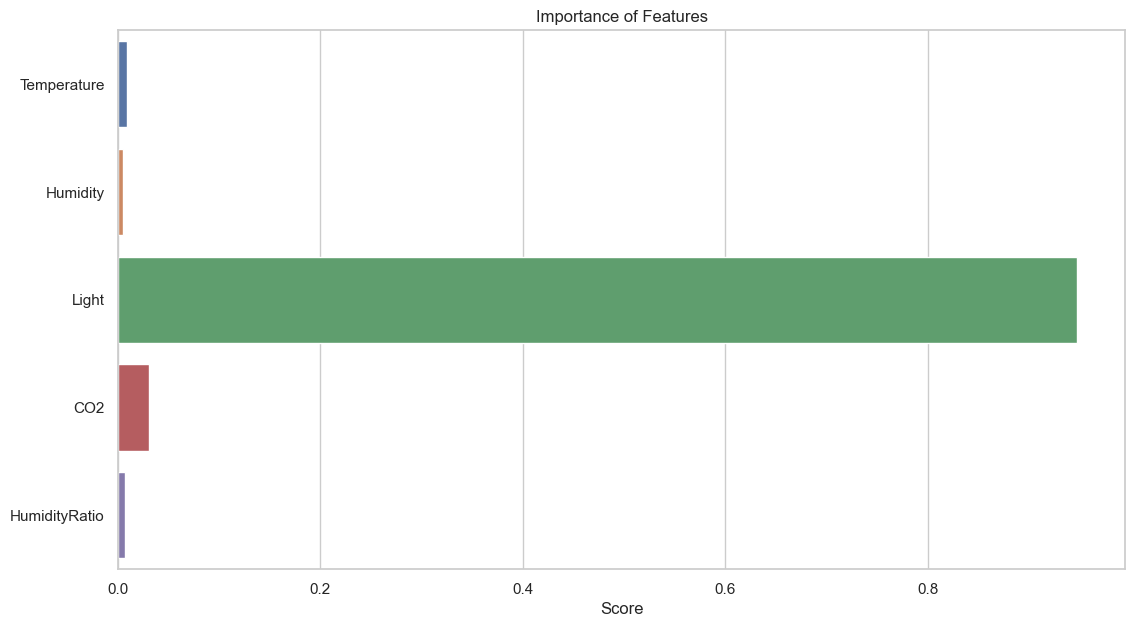

In [47]:
plt.figure(figsize=(13,7))
plt.title('Importance of Features')
sns.barplot( x=featureImportance.Score, y= featureImportance.index) 

## 7. Visualize a Decision Tree

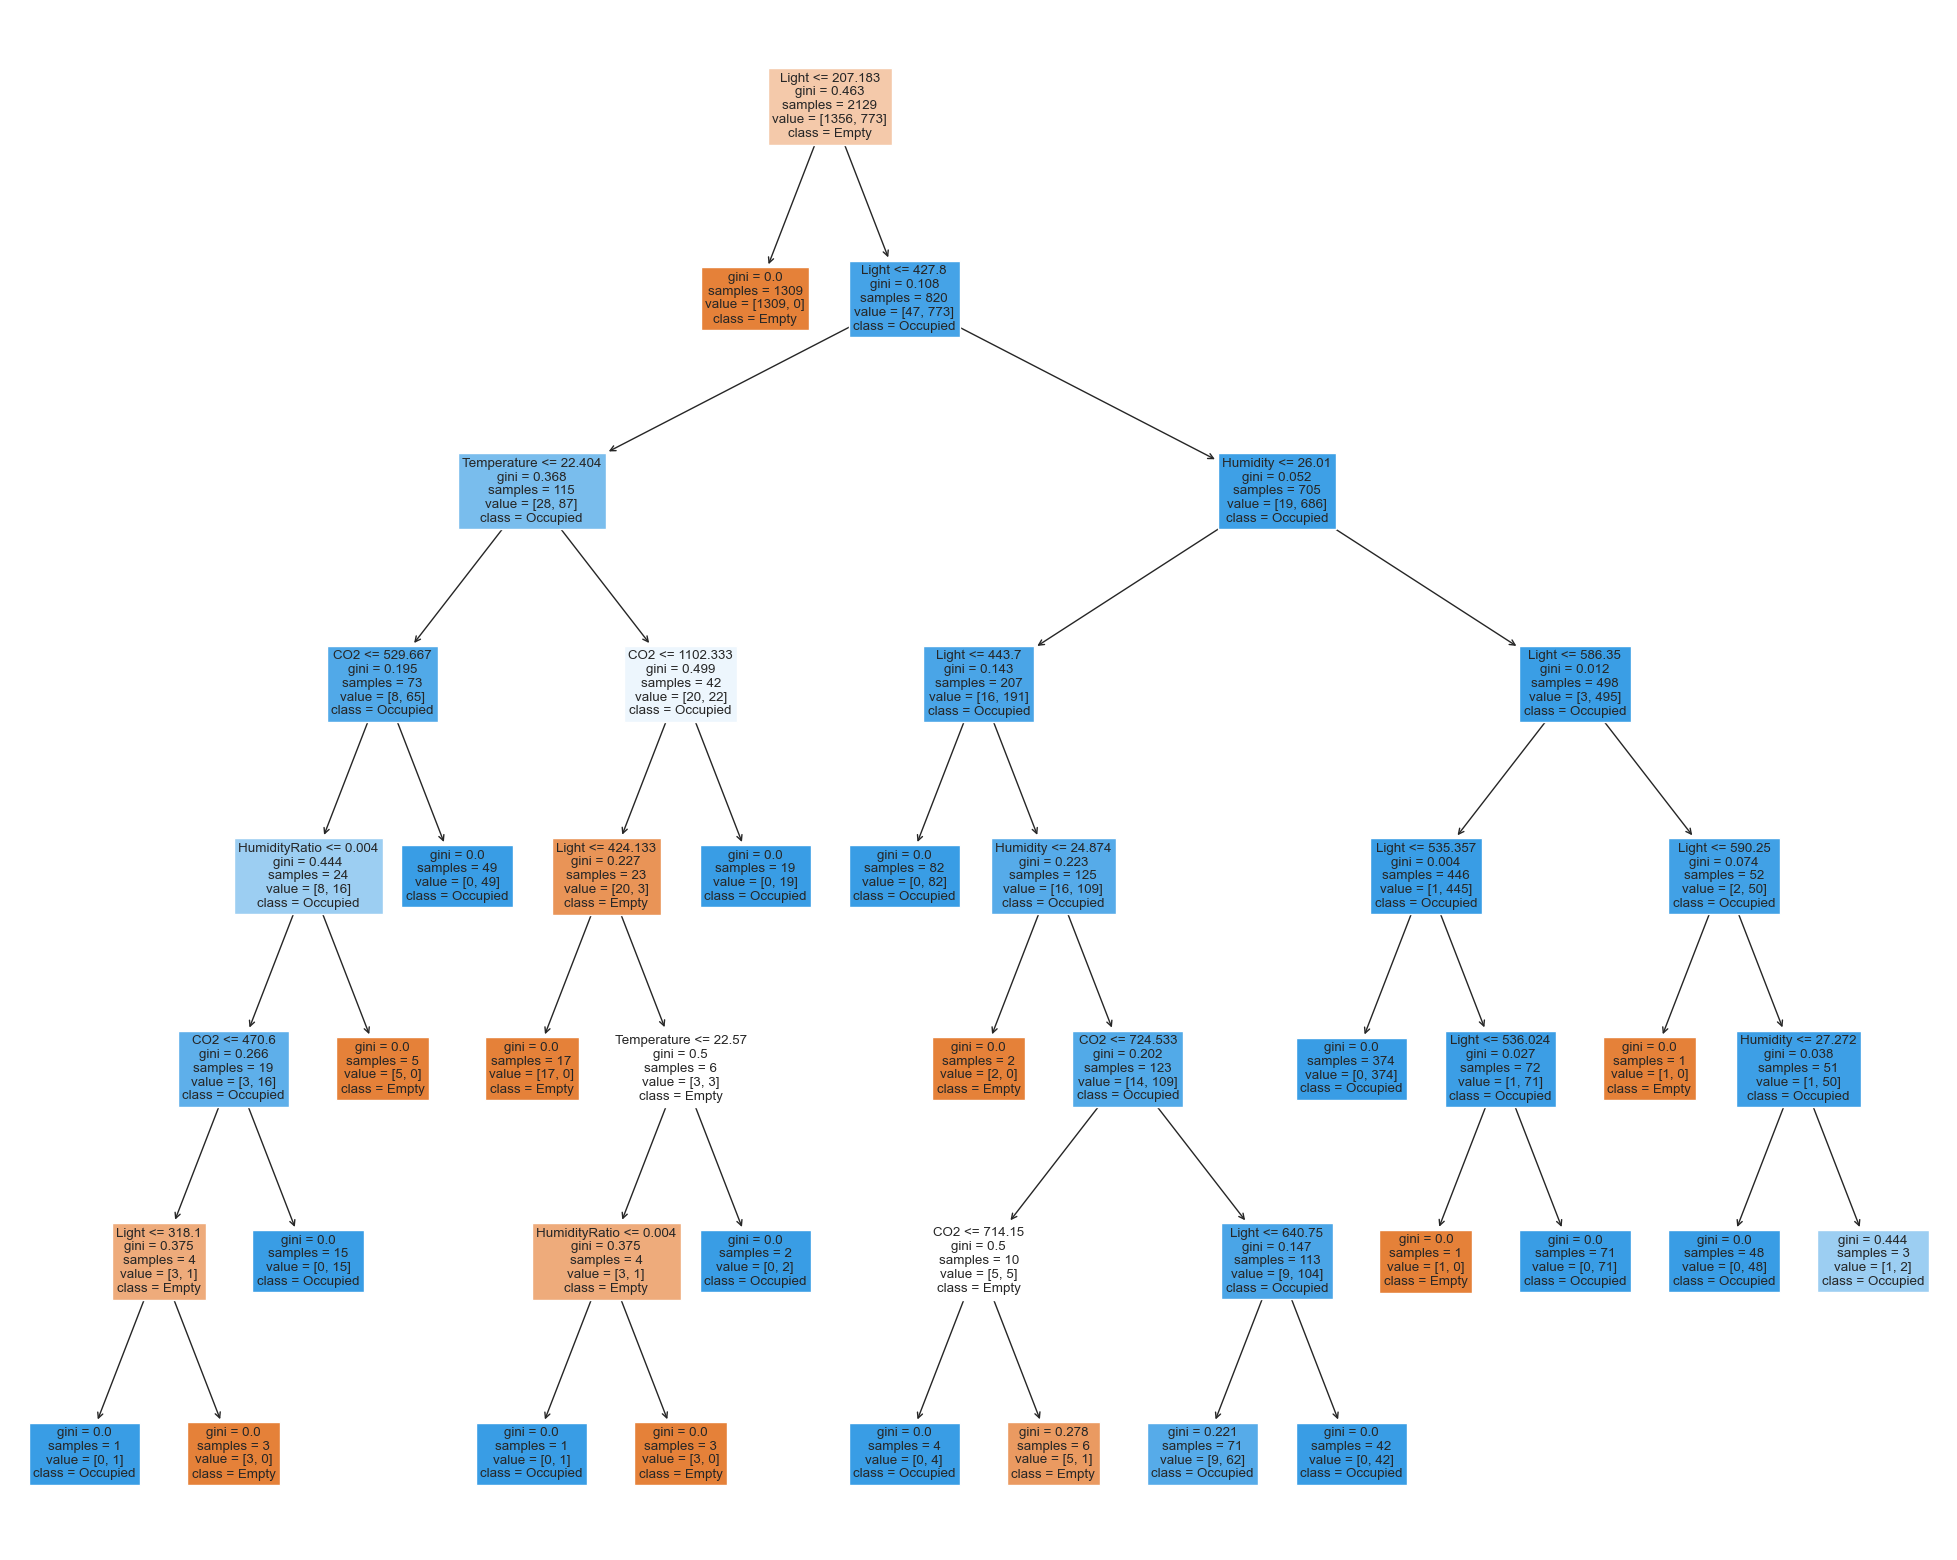

In [48]:
from sklearn import tree

features = features.columns
classes = ['Empty', 'Occupied']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeModel2,
               feature_names = features,
               class_names = classes,
               filled=True
              )

In [49]:
fig.savefig('decistion_tree.png')

### Conclusion:

The chosen model was **DecisionTree Classification** since it´s the most accurate, and got a perfecf accuracy.

Through the analysis of feature importance, we can assume that **Light** is the most important features of classification.